In [154]:
# Opracowane na podstawie https://minpy.readthedocs.io/en/latest/tutorial/rnn_mnist.html
using MLDatasets, Flux
train_data = MLDatasets.MNIST(split=:train)
test_data  = MLDatasets.MNIST(split=:test)

function loader(data; batchsize::Int=1)
    x1dim = reshape(data.features, 28 * 28, :) # reshape 28×28 pixels into a vector of pixels
    yhot  = Flux.onehotbatch(data.targets, 0:9) # make a 10×60000 OneHotMatrix
    Flux.DataLoader((x1dim, yhot); batchsize, shuffle=false)
end

rnn = RNN(196 => 64, tanh)
dense = Dense(196 => 10, identity)

net = Chain(
    dense,
)

Chain(
  Dense(196 => 10),                     # 1_970 parameters
) 

In [155]:
# rnn.cell.Wi
# rnn.cell.Wh
# rnn.cell.b
dense.bias
dense.weight

10×196 Matrix{Float32}:
 -0.0361871  -0.0466518     0.0829067  -0.132399   …  -0.125011     0.045895
 -0.103694   -0.152518      0.154141    0.0843911      0.00474535  -0.139277
 -0.081355   -0.0533546     0.0125435  -0.11038        0.0521908   -0.156732
 -0.0606311   0.120893     -0.117054    0.0266683      0.00984146   0.135619
  0.0140934   0.14094      -0.123216   -0.0718692     -0.0613494    0.0984269
  0.100528    0.0474071     0.048243   -0.112092   …  -0.164113     0.0594513
  0.0608813   0.0513476    -0.0334183   0.119099      -0.0362275   -0.0727937
 -0.0408562  -0.0677258     0.0965777  -0.0811282     -0.0290572   -0.0132601
 -0.143738    0.0577422     0.0903143   0.160907       0.00279522  -0.121922
 -0.0691627  -0.000423435   0.0648212   0.152831       0.0484504   -0.127686

In [156]:
using Statistics: mean  # standard library
function loss_and_accuracy(model, data)
    (x,y) = only(loader(data; batchsize=length(data)))
    Flux.reset!(model)
    ŷ = model(x[  1:196,:])
    ŷ = model(x[197:392,:])
    ŷ = model(x[393:588,:])
    ŷ = model(x[589:end,:])
    loss = Flux.logitcrossentropy(ŷ, y)  # did not include softmax in the model
    acc = round(100 * mean(Flux.onecold(ŷ) .== Flux.onecold(y)); digits=2)
    (; loss, acc, split=data.split)  # return a NamedTuple
end

@show loss_and_accuracy(net, test_data);  # accuracy about 10%, before training

train_log = []
settings = (;
    eta = 15e-3,
    epochs = 5,
    batchsize = 100,
)

opt_state = Flux.setup(Descent(settings.eta), net);

loss_and_accuracy(net, test_data) = (loss = 2.3793356f0, acc = 12.14, split = :test)


In [161]:
using ProgressMeter

for epoch in 1:settings.epochs
    @time for (x,y) in loader(train_data, batchsize=settings.batchsize)
        Flux.reset!(net)
        grads = Flux.gradient(model -> let
                ŷ = model(x[  1:196,:])
                @show sum(x)
                @show sum(ŷ)
                @show sum(dense.weight)
                @show sum(dense.bias)
                # @show sum(rnn.cell.Wi)
                # @show sum(rnn.cell.Wh)
                # @show sum(rnn.cell.b)
                # @show sum(rnn.state)
                
                ŷ = model(x[197:392,:])
                # @show sum(rnn.state)
                ŷ = model(x[393:588,:])
                # @show sum(rnn.state)
                ŷ = model(x[589:end,:])
                # @show sum(rnn.state)
                final = Flux.logitcrossentropy(ŷ, y)
                @show final
                final
            end, net)
        @show sum(grads[1][1][1].weight)
        @show sum(grads[1][1][1].bias)
        # @show sum(grads[1][1][1][1].Wi)
        # @show sum(grads[1][1][1][1].Wh)
        # @show sum(grads[1][1][1][1].b)
        Flux.update!(opt_state, net, grads[1])
    end
    
    loss, acc, _ = loss_and_accuracy(net, train_data)
    test_loss, test_acc, _ = loss_and_accuracy(net, test_data)
    @info epoch acc test_acc
    nt = (; epoch, loss, acc, test_loss, test_acc) 
    push!(train_log, nt)
end

sum(x) = 9925.047f0
sum(ŷ) = -32.98582f0
sum(dense.weight) = -4.8340626f0
sum(dense.bias) = 0.0f0
final = 2.392974f0
sum((((grads[1])[1])[1]).weight) = -1.2759119f-7
sum((((grads[1])[1])[1]).bias) = 1.8626451f-8
sum(x) = 9957.776f0
sum(ŷ) = -45.54794f0
sum(dense.weight) = -4.8340654f0
sum(dense.bias) = -3.2014214f-10
final = 2.3844829f0
sum((((grads[1])[1])[1]).weight) = -1.527369f-7
sum((((grads[1])[1])[1]).bias) = -1.4901161f-8
sum(x) = 10110.835f0
sum(ŷ) = -40.411476f0
sum(dense.weight) = -4.834064f0
sum(dense.bias) = 1.1641532f-10
final = 2.3636672f0
sum((((grads[1])[1])[1]).weight) = 3.427267f-7
sum((((grads[1])[1])[1]).bias) = 2.7939677f-9
sum(x) = 9806.792f0
sum(ŷ) = -36.55447f0
sum(dense.weight) = -4.8340645f0
sum(dense.bias) = -5.820766f-11
final = 2.301751f0
sum((((grads[1])[1])[1]).weight) = -3.501773f-7
sum((((grads[1])[1])[1]).bias) = -5.5879354f-8
sum(x) = 9662.608f0
sum(ŷ) = -27.74571f0
sum(dense.weight) = -4.834064f0
sum(dense.bias) = 8.1490725f-10
final = 2.357306f0
su

┌ Info: 1
│   acc = 40.79
└   test_acc = 40.53



sum((((grads[1])[1])[1]).weight) = 5.029142f-8
sum((((grads[1])[1])[1]).bias) = 1.4901161f-8
sum(x) = 11378.078f0
sum(ŷ) = -38.584908f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = 3.427267f-7
final = 1.9004042f0
sum((((grads[1])[1])[1]).weight) = 8.940697f-8
sum((((grads[1])[1])[1]).bias) = 2.6077032f-8
sum(x) = 12117.627f0
sum(ŷ) = -32.424927f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = 3.427267f-7
final = 1.7213676f0
sum((((grads[1])[1])[1]).weight) = -5.5879354f-8
sum((((grads[1])[1])[1]).bias) = -2.9802322f-8
sum(x) = 11843.318f0
sum(ŷ) = -36.95355f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = 3.2782555f-7
final = 1.7962037f0
sum((((grads[1])[1])[1]).weight) = 1.3271347f-7
sum((((grads[1])[1])[1]).bias) = -3.585592f-8
sum(x) = 10563.568f0
sum(ŷ) = -44.02146f0
sum(dense.weight) = -4.834067f0
sum(dense.bias) = 3.2782555f-7
final = 1.981676f0
sum((((grads[1])[1])[1]).weight) = 1.0000076f-7
sum((((grads[1])[1])[1]).bias) = 2.2351742f-8
sum(x) = 9959.498f0
sum(ŷ) 

┌ Info: 2
│   acc = 46.06
└   test_acc = 46.06


9089.824f0
sum(ŷ) = -64.73914f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = 5.662441f-7
final = 1.7610059f0
sum((((grads[1])[1])[1]).weight) = 2.5704503f-7
sum((((grads[1])[1])[1]).bias) = 2.9802322f-8
sum(x) = 10209.565f0
sum(ŷ) = -37.45023f0
sum(dense.weight) = -4.834066f0
sum(dense.bias) = 5.662441f-7
final = 1.8216008f0
sum((((grads[1])[1])[1]).weight) = -2.7939677f-8
sum((((grads[1])[1])[1]).bias) = 1.717126f-8
sum(x) = 10652.816f0
sum(ŷ) = -32.48946f0
sum(dense.weight) = -4.8340645f0
sum(dense.bias) = 5.9604645f-7
final = 1.7015325f0
sum((((grads[1])[1])[1]).weight) = -2.6542693f-7
sum((((grads[1])[1])[1]).bias) = -1.1175871f-8
sum(x) = 11378.078f0
sum(ŷ) = -38.58484f0
sum(dense.weight) = -4.8340654f0
sum(dense.bias) = 6.556511f-7
final = 1.7672278f0
sum((((grads[1])[1])[1]).weight) = 9.825453f-8
sum((((grads[1])[1])[1]).bias) = -7.450581f-9
sum(x) = 12117.627f0
sum(ŷ) = -32.424862f0
sum(dense.weight) = -4.834066f0
sum(dense.bias) = 6.2584877f-7
final = 1.5314751f0
sum((((

┌ Info: 3
│   acc = 47.93
└   test_acc = 48.26



sum((((grads[1])[1])[1]).weight) = -4.1909516f-8
sum((((grads[1])[1])[1]).bias) = 0.0f0
sum(x) = 8155.8315f0
sum(ŷ) = -16.074814f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = -8.940697f-8
final = 1.8326519f0
sum((((grads[1])[1])[1]).weight) = 1.21071935f-8
sum((((grads[1])[1])[1]).bias) = -3.3527613f-8
sum(x) = 8903.737f0
sum(ŷ) = -18.716597f0
sum(dense.weight) = -4.8340673f0
sum(dense.bias) = -1.1920929f-7
final = 1.5426863f0
sum((((grads[1])[1])[1]).weight) = 1.397566f-7
sum((((grads[1])[1])[1]).bias) = 1.8626451f-8
sum(x) = 9224.169f0
sum(ŷ) = -16.604366f0
sum(dense.weight) = -4.834066f0
sum(dense.bias) = -1.7881393f-7
final = 1.4236833f0
sum((((grads[1])[1])[1]).weight) = -8.288771f-8
sum((((grads[1])[1])[1]).bias) = -1.5832484f-8
sum(x) = 9768.283f0
sum(ŷ) = -16.167164f0
sum(dense.weight) = -4.8340683f0
sum(dense.bias) = -1.4901161f-7
final = 1.7128955f0
sum((((grads[1])[1])[1]).weight) = -1.8812716f-7
sum((((grads[1])[1])[1]).bias) = -3.9115548f-8
sum(x) = 9895.506f0
sum(

Excessive output truncated after 524290 bytes.

-4.4703484f-7
final = 1.414934f0
sum((((grads[1])[1])[1]).weight) = 1.2293458f-7
sum((((grads[1])[1])[1]).bias) = 0.0f0
sum(x) = 10869.608f0
sum(ŷ) = -42.480568f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = -4.172325f-7
final = 1.4551609f0
sum((((grads[1])[1])[1]).weight) = -1.0803342f-7
sum((((grads[1])[1])[1]).bias) = 1.8626451f-8
sum(x) = 9648.185f0
sum(ŷ) = -30.288855f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = -4.4703484f-7
final = 1.5132202f0
sum((((grads[1])[1])[1]).weight) = -3.213063f-8
sum((((grads[1])[1])[1]).bias) = -2.3283064f-10
sum(x) = 8431.922f0
sum(ŷ) = -31.12451f0
sum(dense.weight) = -4.8340654f0
sum(dense.bias) = -3.874302f-7
final = 1.6046209f0
sum((((grads[1])[1])[1]).weight) = -1.3038516f-8
sum((((grads[1])[1])[1]).bias) = 1.3038516f-8
sum(x) = 9406.424f0
sum(ŷ) = -39.859543f0
sum(dense.weight) = -4.8340664f0
sum(dense.bias) = -4.172325f-7
final = 1.5501703f0
sum((((grads[1])[1])[1]).weight) = 1.6763806f-7
sum((((grads[1])[1])[1]).bias) = 7.450581

In [169]:
bias_multiplicator0 = -3.2014214f-10 / 1.8626451f-8

@show bias_multiplicator0

bias_multiplicator1 = (1.1641532f-10 - -3.2014214f-10) / -1.4901161f-8

@show bias_multiplicator1

bias_multiplicator0 = -0.0171875f0
bias_multiplicator1 = -0.029296875f0


-0.029296875f0

In [236]:
Flux.reset!(net)
x1, y1 = first(loader(train_data)); # (28×28×1×1 Array{Float32, 3}, 10×1 OneHotMatrix(::Vector{UInt32}))
y1hat = net(x1[  1:196,:])
y1hat = net(x1[197:392,:])
y1hat = net(x1[393:588,:])
y1hat = net(x1[589:end,:])
@show hcat(Flux.onecold(y1hat, 0:9), Flux.onecold(y1, 0:9))

@show loss_and_accuracy(net, train_data);

hcat(Flux.onecold(y1hat, 0:9), Flux.onecold(y1, 0:9)) = [7 5]
loss_and_accuracy(net, train_data) = (loss = 2.547189f0, acc = 8.21, split = :train)


In [157]:
include("Graph.jl")
include("DataModule.jl")
include("UtilsModule.jl")
include("AccuracyModule.jl")

Main.AccuracyModule

In [158]:
# Cache
dense_weight = deepcopy(dense.weight)
dense_bias = deepcopy(dense.bias)


10-element Vector{Float32}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [159]:
using .DataModule, .UtilsModule, .AccuracyModule
using Random, Plots

function load_data(batch_size)
    println("Loading train data...")
    train_x, train_y = DataModule.preprocess(:train; one_hot = true)

    train_x_batched = DataModule.batch(train_x, batch_size)
    train_y_batched = DataModule.batch(train_y, batch_size)

    println("Loading test data...")
    test_x, test_y = DataModule.preprocess(:test; one_hot = true)
    return train_x, train_y, train_x_batched, train_y_batched, test_x, test_y
end

function update_weights!(graph::Vector, lr::Float64, batch_size::Int64)
    for node in graph
        if isa(node, Variable) && hasproperty(node, :gradient) && node.gradient != nothing
#             println(string("Update ", node.name, " ", sum(node.output), " ", sum(node.gradient)))
            if node.name == "state" || node.name == "x"
                node.output = node.gradient
                node.gradient = nothing
#                 println(string("UpdateSPECIAL ", node.name, " ", sum(node.output)))
            else
                println(string("Sum1: ", node.name, " gradient: ", sum(node.gradient), " output ", sum(node.output)))
                node.gradient ./= batch_size
                node.output .-= lr * node.gradient
                println(string("Sum2: ", node.name, " gradient: ", sum(node.gradient), " output ", sum(node.output)))
                node.gradient .= 0
            end
        end
    end
end

function reset_state!(graph::Vector)
    for node in graph
        if isa(node, Variable) && hasproperty(node, :gradient) && node.gradient != nothing
            node.gradient .= 0
        end
    end
end

function main()
    batch_size = 100
    train_x, train_y, train_x_batched, train_y_batched, test_x, test_y = load_data(batch_size)
    batches = randperm(size(train_x_batched, 1))

    epochs = 5

    x = Variable([0.], name="x")
    y = Variable([0.], name="y")

    # rnn.cell.Wi
    # rnn.cell.Wh
    # rnn.cell.b
    
    wd = Variable(deepcopy(dense_weight), name="wd")
    bd = Variable(deepcopy(dense_bias), name="bd")

    wr = Variable(deepcopy(rnn.cell.Wi), name = "wr")
    br = Variable(deepcopy(rnn.cell.b), name = "br")
    hwr = Variable(deepcopy(rnn.cell.Wh), name = "hwr")
    state = Variable(zeros(Float32, size(x.output)), name = "state")

    # wd = Variable(UtilsModule.glorot_uniform(10, 64), name="wd")
    # bd = Variable(UtilsModule.glorot_uniform(10, ), name="bd")

    # wr = Variable(UtilsModule.glorot_uniform(64, 196), name = "wr")
    # br = Variable(UtilsModule.glorot_uniform(64, ), name = "br")
    # hwr = Variable(UtilsModule.glorot_uniform(64, 64), name = "hwr")
    # state = Variable(zeros(Float32, size(x.output)), name = "state")


    # r = rnn_layer(x, wr, br, hwr, state)
    d = dense_layer(x, wd, bd)
    e = cross_entropy_loss(d, y)
    graph = topological_sort(d)

    batch_loss = Float64[]
    println("Training")
    for epoch in 1:epochs
        @time for (xb,yb) in loader(train_data, batchsize=settings.batchsize)
            reset_state!(graph)
            y.output = yb
            x.output = xb[  1:196,:]
            state.output = zeros(Float32, 64, size(x.output, 2))

            result = forward!(graph)
            @show sum(xb)
            @show sum(result)
            @show sum(wd.output)
            @show sum(bd.output)
            # @show sum(wr.output)
            # @show sum(hwr.output)
            # @show sum(br.output)
            # @show sum(state.output)

            x.output = xb[197:392,:]
            forward!(graph)
            # @show sum(state.output)

            x.output = xb[393:588,:]
            forward!(graph)
            # @show sum(state.output)

            x.output = xb[589:end,:]
            result = forward!(graph)
            # @show sum(state.output)

            loss, acc, gradient = AccuracyModule.loss_and_accuracy(result, yb)
            # @show loss
            push!(batch_loss, loss)
            # graph_optimizer = topological_sort(e)
            backward!(graph, seed=gradient)

            @show sum(wd.gradient)
            @show sum(bd.gradient)
            # @show sum(wr.gradient)
            # @show sum(hwr.gradient)
            # @show sum(br.gradient)
            # Update gradientu raczej na samym końcu jak w Fluxie
            update_weights!(graph, 15e-3, batch_size)
            # reset_state!(graph_optimizer)
        end
        reset_state!(graph)

        test_graph = topological_sort(d)

        y.output = test_y
        x.output = test_x[  1:196,:]
        state.output = zeros(Float32, 64, size(x.output, 2))
        reset_state!(test_graph)
        forward!(test_graph)

        x.output = test_x[197:392,:]
        forward!(test_graph)

        x.output = test_x[393:588,:]
        forward!(test_graph)

        x.output = test_x[589:end,:]
        result = forward!(test_graph)

        loss, acc, _ = AccuracyModule.loss_and_accuracy(result, test_y)

        state.output = zeros(Float32, size(x.output))
        @show epoch loss acc
    end
    plot(batch_loss, xlabel="Batch num", ylabel="loss", title="Loss over batches")
end


main (generic function with 1 method)

Loading train data...
Loading test data...
Training
sum(xb) = 9925.047f0
sum(result) = -32.98582f0
sum(wd.output) = -4.8340626f0
sum(bd.output) = 0.0f0
sum(wd.gradient) = 1.7881393f-7
sum(bd.gradient) = 2.7939677f-8
Sum1: wd gradient: 1.7881393e-7 output -4.8340626
Sum2: wd gradient: 1.2340024e-7 output -4.8340654
Sum1: bd gradient: 2.7939677e-8 output 0.0
Sum2: bd gradient: 2.3283064e-10 output -3.637979e-12
sum(xb) = 9957.776f0
sum(result) = -45.54793f0
sum(wd.output) = -4.8340654f0
sum(bd.output) = -3.637979f-12
sum(wd.gradient) = 6.914139f-6
sum(bd.gradient) = 3.7252903f-9
Sum1: wd gradient: 6.914139e-6 output -4.8340654
Sum2: wd gradient: 2.2351742e-8 output -4.834063
Sum1: bd gradient: 3.7252903e-9 output -3.637979e-12
Sum2: bd gradient: 1.1641532e-10 output -7.275958e-12
sum(xb) = 10110.835f0
sum(result) = -40.411476f0
sum(wd.output) = -4.834063f0
sum(bd.output) = -7.275958f-12
sum(wd.gradient) = -4.053116f-6
sum(bd.gradient) = 1.9557774f-8
Sum1: wd gradient: -4.053116e-6 output

Excessive output truncated after 524290 bytes.

9730.549f0
sum(result) = -36.224113f0
sum(wd.output) = -4.834062f0
sum(bd.output) = 1.1874363f-8
sum(wd.gradient) = 2.026558f-6
sum(bd.gradient) = -8.381903f-9
Sum1: wd gradient: 2.026558e-6 output -4.834062
Sum2: wd gradient: 5.820766e-9 output -4.8340626
Sum1: bd gradient: -8.381903e-9 output 1.1874363e-8
Sum2: bd gradient: -2.910383e-11 output 1.1641532e-8
sum(xb) = 10157.667f0
sum(result) = -21.343472f0
sum(wd.output) = -4.8340626f0
sum(bd.output) = 1.1641532f-8
sum(wd.gradient) = 2.7418137f-6
sum(bd.gradient) = 1.8626451f-8
Sum1: wd gradient: 2.7418137e-6 output -4.8340626
Sum2: wd gradient: -1.8626451e-8 output -4.834061
Sum1: bd gradient: 1.8626451e-8 output 1.1641532e-8
Sum2: bd gradient: 1.4551915e-10 output 1.21071935e-8
sum(xb) = 10027.969f0
sum(result) = -39.8185f0
sum(wd.output) = -4.834061f0
sum(bd.output) = 1.21071935f-8
sum(wd.gradient) = 8.493662f-7
sum(bd.gradient) = 3.7252903f-9
Sum1: wd gradient: 8.493662e-7 output -4.834061
Sum2: wd gradient: 5.844049e-8 output -4.

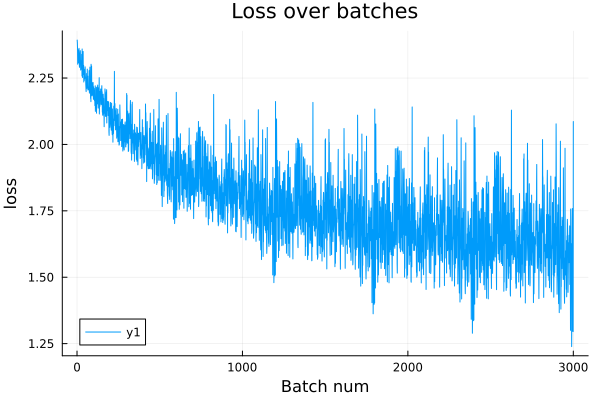

In [160]:
main()

In [199]:
3.600776550927165e-6 * 1.5f-3

5.40116487333953e-9